#### Setting the Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
pwd

'/home/greatest/Desktop/Houseprices'

In [3]:
#Reading the houseprice file
df = pd.read_csv("houseprice.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,overall_grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15
0,1453602313,20141029T000000,297000.0,2,1.50,1430,1650,3.0,0.0,0,...,7.0,1430,0.0,1999,0,98125,47.7222,-122.290,1430,1650
1,2225059214,20140808T000000,1580000.0,4,3.25,4670,51836,2.0,0.0,0,...,12.0,4670,0.0,1988,0,98005,47.6350,-122.164,4230,41075
2,2768000270,20140625T000000,562100.0,2,0.75,1440,3700,1.0,0.0,0,...,7.0,1200,240.0,1914,0,98107,47.6707,-122.364,1440,4300
3,6819100040,20140624T000000,631500.0,2,1.00,1130,2640,1.0,0.0,0,...,8.0,1130,0.0,1927,0,98109,47.6438,-122.357,1680,3200
4,4027700666,20150426T000000,780000.0,4,2.50,3180,9603,2.0,0.0,2,...,9.0,3180,0.0,2002,0,98155,47.7717,-122.277,2440,15261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18969,4331000400,20150220T000000,252000.0,3,1.50,1150,13200,1.0,0.0,0,...,7.0,1150,0.0,1956,0,98166,47.4752,-122.345,1220,13066
18970,7967900150,20150430T000000,367950.0,4,2.50,3030,9500,2.0,0.0,0,...,8.0,3030,0.0,1989,0,98001,47.3511,-122.287,2650,9500
18971,1895000045,20150504T000000,195000.0,2,1.00,820,5100,1.0,0.0,0,...,6.0,820,0.0,1953,0,98118,47.5156,-122.262,1170,5304
18972,65000085,20140708T000000,430000.0,3,2.00,1550,6039,1.0,0.0,0,...,7.0,830,720.0,1942,0,98126,47.5436,-122.378,1330,6042


In [4]:
#Drop the ID column since it is unnecessary for the prediction process
df.drop("id",axis =1,inplace = True)

In [5]:
df.shape

(18974, 20)

#### Handling Missing Data

In [6]:
df.isnull().sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors            83
waterfront        80
view               0
condition         74
overall_grade     93
sqft_above         0
sqft_basement     70
year_built         0
year_renovated     0
zipcode            0
latitude           0
longitude          0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [7]:
df["waterfront"] = df["waterfront"].fillna((df["waterfront"].mean()))

In [8]:
df = df.fillna(df.median())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18974 entries, 0 to 18973
Data columns (total 20 columns):
date              18974 non-null object
price             18974 non-null float64
bedrooms          18974 non-null int64
bathrooms         18974 non-null float64
sqft_living       18974 non-null int64
sqft_lot          18974 non-null int64
floors            18974 non-null float64
waterfront        18974 non-null float64
view              18974 non-null int64
condition         18974 non-null float64
overall_grade     18974 non-null float64
sqft_above        18974 non-null int64
sqft_basement     18974 non-null float64
year_built        18974 non-null int64
year_renovated    18974 non-null int64
zipcode           18974 non-null int64
latitude          18974 non-null float64
longitude         18974 non-null float64
sqft_living15     18974 non-null int64
sqft_lot15        18974 non-null int64
dtypes: float64(9), int64(10), object(1)
memory usage: 2.9+ MB


In [10]:
#Drop the date column since it is unnecessary for the prediction process
df.drop("date",axis =1,inplace = True)

### Detection and Removal of outliers¶

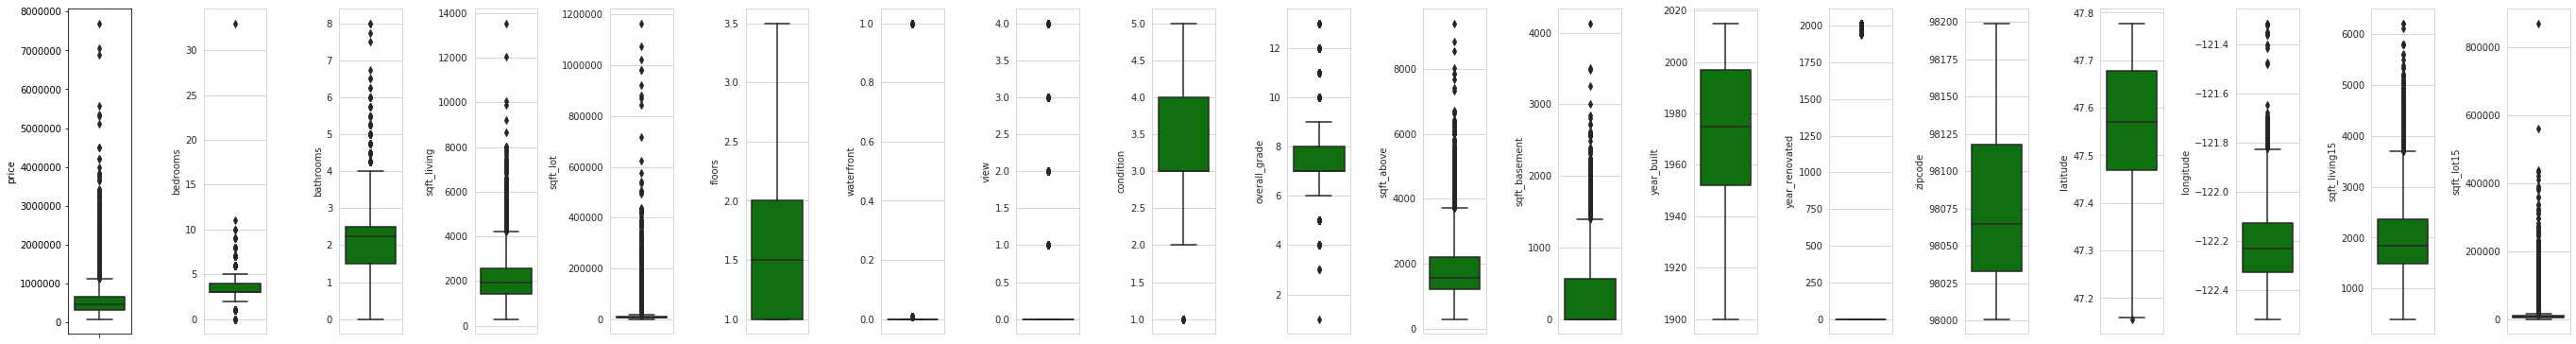

In [11]:
# Outliers for each feature
columns = df.columns.tolist()
number_of_columns = len(columns)
number_of_rows = len(columns)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(columns)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[columns[i]],color='green',orient='v')
    plt.tight_layout()

In [12]:
df.shape

(18974, 19)

df (18974, 19)
new_df (16404, 19)


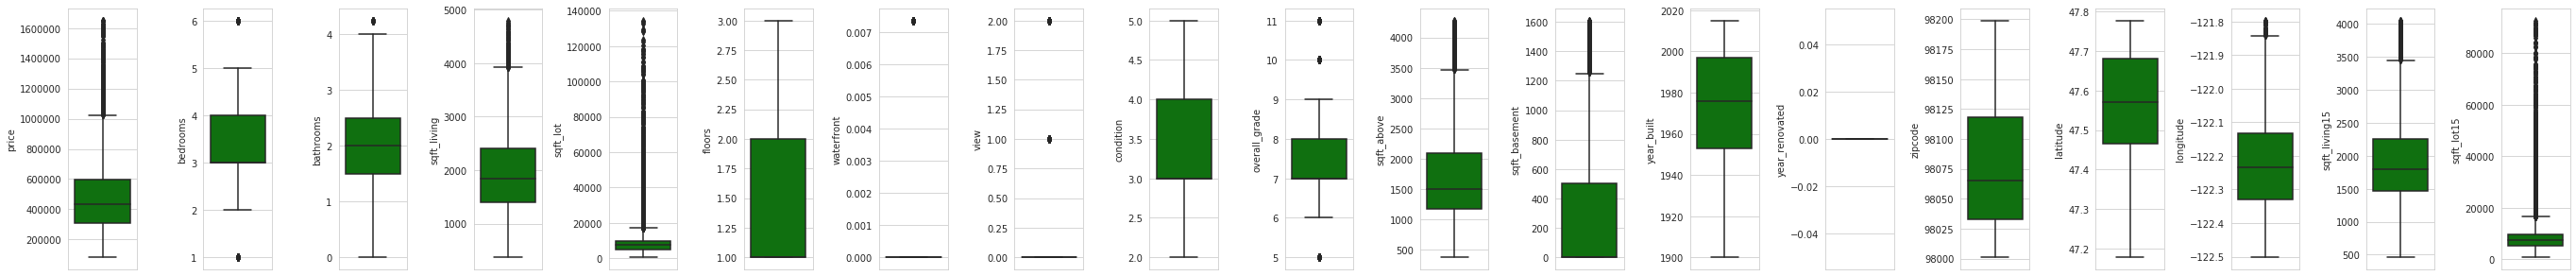

In [13]:
#Removing outliers using z-score
from scipy import stats
new_df = df.copy()
new_df = new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)] #3 threshold
print("df",df.shape)
print("new_df",new_df.shape)

# Outliers for each feature
columns = new_df.columns.tolist()
number_of_columns = len(columns)
number_of_rows = len(columns)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
for i in range(0,len(columns)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(new_df[columns[i]],color='green',orient='v')
    plt.tight_layout()

### Exploratory Data Analysis

In [14]:
#descriptive summary
new_df['price'].describe()

count    1.640400e+04
mean     4.812272e+05
std      2.330475e+05
min      8.200000e+04
25%      3.110000e+05
50%      4.310000e+05
75%      5.981250e+05
max      1.650000e+06
Name: price, dtype: float64

###### Test and correction for normality

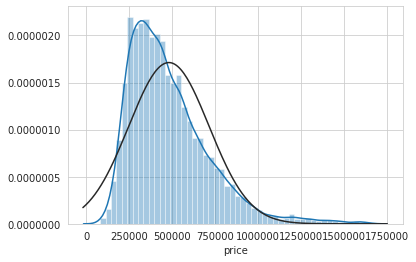

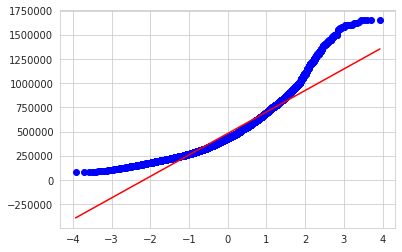

skewness: 1.366062
kurtosis: 2.640428


In [15]:
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

# kernel density plot
sns.distplot(new_df.price,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('price distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(new_df['price']);
#QQ plot
fig = plt.figure()
res = stats.probplot(new_df['price'], plot=plt)
plt.show()
print("skewness: %f" % new_df['price'].skew())
print("kurtosis: %f" % new_df['price'].kurt())

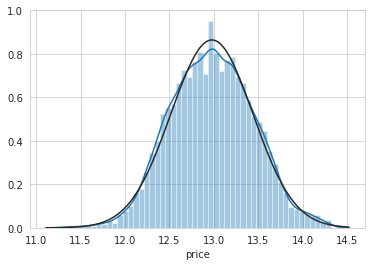

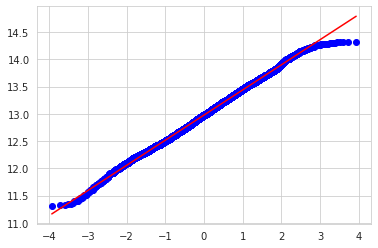

skewness: 0.029777
kurtosis: -0.163104


In [16]:
#log transform the target 
new_df["price"] = np.log1p(new_df["price"])

# kernel density plot
sns.distplot(new_df.price,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('price distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(new_df['price']);
#QQ plot
fig = plt.figure()
res = stats.probplot(new_df['price'], plot=plt)
plt.show()
print("skewness: %f" % new_df['price'].skew())
print("kurtosis: %f" % new_df['price'].kurt())

#### Correlation between Features

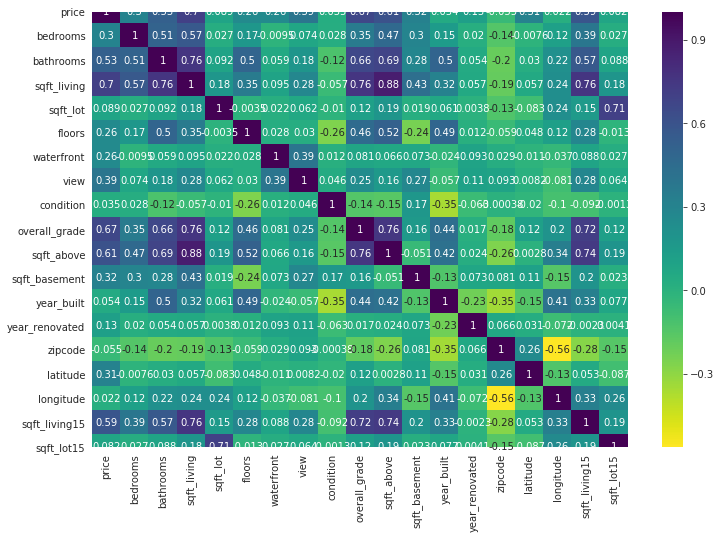

In [17]:
cr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cr, annot=True, cmap = 'viridis_r')

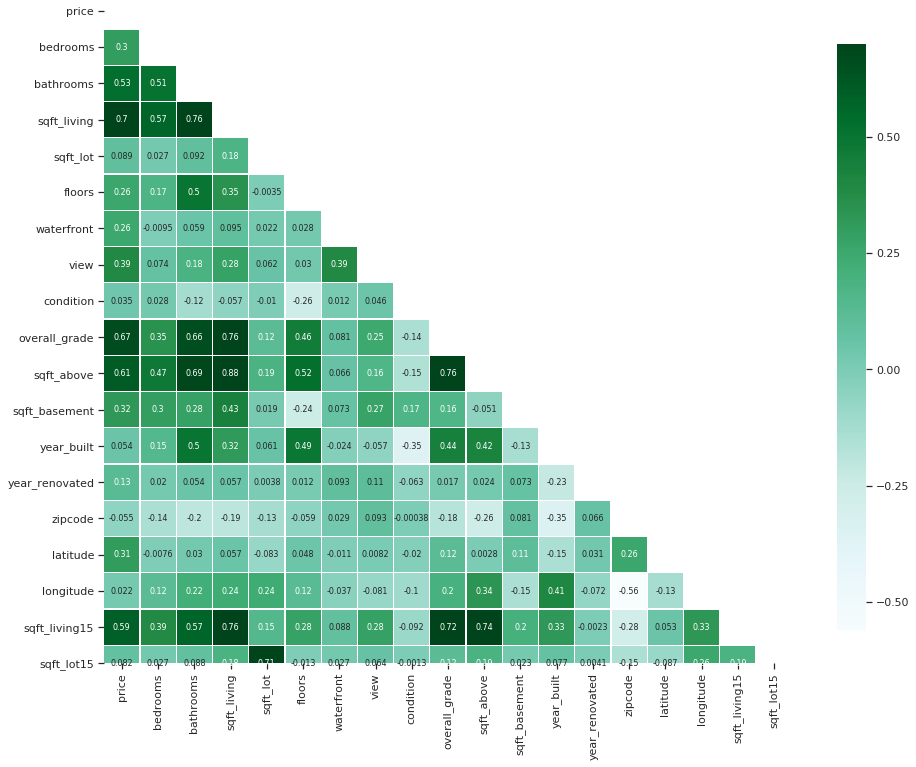

In [39]:
#better view
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','overall_grade','sqft_above','sqft_basement','year_built','year_renovated',
            'zipcode','latitude','longitude','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [18]:
import pingouin as pg
pg.corr(x=df['sqft_living'],y=df['price'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,18974,0.703,"[0.7, 0.71]",0.495,0.494,0.0,inf,1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


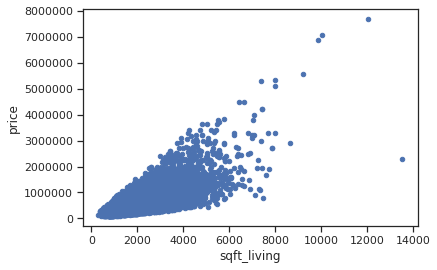

In [19]:
df.plot.scatter("sqft_living","price")

### Analysis of Data

In [20]:
#Selection of Target and Feature variables
ftr = new_df.columns.tolist()
ftr.remove('price')

In [21]:
x = new_df[ftr]
y = new_df.price

In [22]:
print(x.shape)
print(y.shape)

(16404, 18)
(16404,)


In [23]:
#Sliting the data into training and testing
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [24]:
print(train_x.shape)
print(test_x.shape)

(13123, 18)
(3281, 18)


In [25]:
#Model building using Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [26]:
#training the model
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### Model Evaluation

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

train_ypred = lr.predict(train_x)
rmse = (np.sqrt(mean_squared_error(train_y, train_ypred)))
r2 = r2_score(train_y,train_ypred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

test_ypred = lr.predict(test_x)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(test_y, test_ypred)))

# r-squared score of the model
r2 = r2_score(test_y, test_ypred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.24033976965028706
R2 score is 0.7311158548395501


The model performance for testing set
--------------------------------------
RMSE is 0.24149420452423148
R2 score is 0.7176574296245348


In [28]:
import xgboost

In [29]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [30]:
traindf, testdf = train_test_split(train_x, test_size = 0.3)
xgb.fit(train_x,train_y)

/home/greatest/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [30]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
train_x = feature_scaler.fit_transform(train_x)
test_x = feature_scaler.transform(test_x)

In [31]:
from sklearn.metrics import explained_variance_score

predictions = xgb.predict(test_x)
print(explained_variance_score(predictions,test_y))

0.8598651372522862


In [36]:
print (mean_squared_error(test_y, predictions))

0.02539719332756186


In [35]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'id':test_y,'price':predictions})

#Visualize the first 5 rows
submission.head()

,id,price
12708,13.223115,13.237697
2163,12.441149,12.271996
1857,13.142168,13.053937
11661,13.217675,13.134416
16851,13.317932,13.460658


In [40]:
submission.to_csv("my_submission.csv",index=False)